In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import sidetable as stb
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from num2words import num2words
import nltk
from sklearn.decomposition import NMF

In [412]:
df0 = pd.read_csv('../data/books_25_pages_description.csv',skipinitialspace=True)
df0 = df0.rename(columns = lambda x: x.strip())
print(len(df0.index),len(df0.columns))
df1 = pd.read_csv('../data/books_25_pages_author_info_description.csv',skipinitialspace=True)
df1 = df1.rename(columns = lambda x: x.strip())
print(len(df1.index),len(df1.columns))
df1 = df1.merge(df0)
df1 = df1.rename(columns = lambda x: x.strip())
print(len(df1.index),len(df1.columns))
# exclude validation data
df_validation = pd.read_csv('../data/validation.csv',skipinitialspace=True)
df_validation = df_validation.rename(columns = lambda x: x.strip())
df1 = df1[~df1['book_title'].isin(df_validation['book_title'].values)]
df1.head()

1249 256
1249 256
1253 257


,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,kindle_price,author_link,...,genre_vegan,genre_war,genre_womens,genre_womens-studies,genre_world-war-ii,genre_writing,genre_young-adult,genre_zen,author_num_unique_books,book_reviews
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,NaN,33082.0,NaN,https://www.goodreads.com/author/show/8529755....,...,0,0,0,0,0,0,0,0,36.0,If you follow my reviews/blog at all you prob...
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,NaN,15121.0,NaN,https://www.goodreads.com/author/show/3317.Dal...,...,0,0,0,0,0,0,0,0,396.0,This is an incredible book. Ive heard people m...
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,9.780743e+12,10277.0,NaN,https://www.goodreads.com/author/show/1538.Ste...,...,0,0,0,0,0,0,0,0,505.0,This book explains 7 principles that make a pe...
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,9.781400e+12,16950.0,NaN,https://www.goodreads.com/author/show/5201530....,...,0,0,0,0,0,0,0,0,7.0,Read this because of fascinating NYT magazine ...
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,9.781608e+12,27998.0,9.99,https://www.goodreads.com/author/show/5589647....,...,0,0,0,0,0,0,0,0,18.0,You will never use spare buttons. WORDS WE ALL...


In [413]:
df2 = df1.copy() #[['book_title','book_description']]
df2.loc[:,['book_title','book_description','book_reviews']].stb.missing()

,missing,total,percent
book_description,35,1122,3.119430
book_title,6,1122,0.534759
book_reviews,6,1122,0.534759


In [414]:
df3 = df2.dropna(subset=['book_description'])
df3.loc[:,['book_title','book_description','book_reviews']].stb.missing()

,missing,total,percent
book_title,0,1087,0.0
book_description,0,1087,0.0
book_reviews,0,1087,0.0


In [415]:
df4_0 = df3.copy()
for coli in df3.columns:
    if 'genre_' in coli:
        df4_0[coli] = df3.apply(lambda x : 1 if x[coli] > 2 else 0,axis=1)
df4_0.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,kindle_price,author_link,...,genre_vegan,genre_war,genre_womens,genre_womens-studies,genre_world-war-ii,genre_writing,genre_young-adult,genre_zen,author_num_unique_books,book_reviews
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,NaN,33082.0,NaN,https://www.goodreads.com/author/show/8529755....,...,0,0,0,0,0,0,0,0,36.0,If you follow my reviews/blog at all you prob...
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,NaN,15121.0,NaN,https://www.goodreads.com/author/show/3317.Dal...,...,0,0,0,0,0,0,0,0,396.0,This is an incredible book. Ive heard people m...
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,9.780743e+12,10277.0,NaN,https://www.goodreads.com/author/show/1538.Ste...,...,0,0,0,0,0,0,0,0,505.0,This book explains 7 principles that make a pe...
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,9.781400e+12,16950.0,NaN,https://www.goodreads.com/author/show/5201530....,...,0,0,0,0,0,0,0,0,7.0,Read this because of fascinating NYT magazine ...
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,9.781608e+12,27998.0,9.99,https://www.goodreads.com/author/show/5589647....,...,0,0,0,0,0,0,0,0,18.0,You will never use spare buttons. WORDS WE ALL...


In [416]:
df4_1 = df4_0.copy()
for coli in df4_0.columns:
    if 'genre_' in coli:
        if df4_0[coli].sum() < 3:
            df4_1.drop(coli,axis=1,inplace=True)
df4_1.drop('genre_unfinished',axis=1,inplace=True)
print(len(df4_0.columns),len(df4_1.columns))
df4_1.head()

257 147


,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,kindle_price,author_link,...,genre_teen,genre_theology,genre_travel,genre_vegan,genre_war,genre_womens,genre_writing,genre_zen,author_num_unique_books,book_reviews
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,NaN,33082.0,NaN,https://www.goodreads.com/author/show/8529755....,...,0,0,0,0,0,0,0,0,36.0,If you follow my reviews/blog at all you prob...
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,NaN,15121.0,NaN,https://www.goodreads.com/author/show/3317.Dal...,...,0,0,0,0,0,0,0,0,396.0,This is an incredible book. Ive heard people m...
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,9.780743e+12,10277.0,NaN,https://www.goodreads.com/author/show/1538.Ste...,...,0,0,0,0,0,0,0,0,505.0,This book explains 7 principles that make a pe...
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,9.781400e+12,16950.0,NaN,https://www.goodreads.com/author/show/5201530....,...,0,0,0,0,0,0,0,0,7.0,Read this because of fascinating NYT magazine ...
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,9.781608e+12,27998.0,9.99,https://www.goodreads.com/author/show/5589647....,...,0,0,0,0,0,0,0,0,18.0,You will never use spare buttons. WORDS WE ALL...


In [417]:
df4 = df4_1.copy()
genre_columns = []
for coli in df4.columns:
    if 'genre_' in coli:
        genre_columns.append(coli)

all_genres_str = []
for index, row in df4.iterrows():
    string_cols = ""
    for coli in genre_columns:
        if row[coli] > 0:
            string_cols += coli.split('enre_')[1]+" "
    all_genres_str.append(string_cols)
df4['genres_str'] = all_genres_str
df4.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,kindle_price,author_link,...,genre_theology,genre_travel,genre_vegan,genre_war,genre_womens,genre_writing,genre_zen,author_num_unique_books,book_reviews,genres_str
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,NaN,33082.0,NaN,https://www.goodreads.com/author/show/8529755....,...,0,0,0,0,0,0,0,36.0,If you follow my reviews/blog at all you prob...,adult audiobook business humor non-fiction per...
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,NaN,15121.0,NaN,https://www.goodreads.com/author/show/3317.Dal...,...,0,0,0,0,0,0,0,396.0,This is an incredible book. Ive heard people m...,audiobook business classics communication lead...
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,9.780743e+12,10277.0,NaN,https://www.goodreads.com/author/show/1538.Ste...,...,0,0,0,0,0,0,0,505.0,This book explains 7 principles that make a pe...,audiobook business leadership management non-f...
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,9.781400e+12,16950.0,NaN,https://www.goodreads.com/author/show/5201530....,...,0,0,0,0,0,0,0,7.0,Read this because of fascinating NYT magazine ...,audiobook business leadership non-fiction pers...
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,9.781608e+12,27998.0,9.99,https://www.goodreads.com/author/show/5589647....,...,0,0,0,0,0,0,0,18.0,You will never use spare buttons. WORDS WE ALL...,adult audiobook how-to japan non-fiction perso...


In [418]:
df5 = df4.copy()
df5['title_description_genres'] = df4.apply(lambda x : x['book_title']+" "+x['genres_str']+" "+x['book_description']+" "+x['book_reviews'],axis=1)
df5.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,kindle_price,author_link,...,genre_travel,genre_vegan,genre_war,genre_womens,genre_writing,genre_zen,author_num_unique_books,book_reviews,genres_str,title_description_genres
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,NaN,33082.0,NaN,https://www.goodreads.com/author/show/8529755....,...,0,0,0,0,0,0,36.0,If you follow my reviews/blog at all you prob...,adult audiobook business humor non-fiction per...,The Subtle Art of Not Giving a F*ck adult audi...
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,NaN,15121.0,NaN,https://www.goodreads.com/author/show/3317.Dal...,...,0,0,0,0,0,0,396.0,This is an incredible book. Ive heard people m...,audiobook business classics communication lead...,How to Win Friends and Influence People audiob...
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,9.780743e+12,10277.0,NaN,https://www.goodreads.com/author/show/1538.Ste...,...,0,0,0,0,0,0,505.0,This book explains 7 principles that make a pe...,audiobook business leadership management non-f...,The 7 Habits of Highly Effective People audiob...
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,9.781400e+12,16950.0,NaN,https://www.goodreads.com/author/show/5201530....,...,0,0,0,0,0,0,7.0,Read this because of fascinating NYT magazine ...,audiobook business leadership non-fiction pers...,The Power of Habit audiobook business leadersh...
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,9.781608e+12,27998.0,9.99,https://www.goodreads.com/author/show/5589647....,...,0,0,0,0,0,0,18.0,You will never use spare buttons. WORDS WE ALL...,adult audiobook how-to japan non-fiction perso...,The Life-Changing Magic of Tidying Up adult au...


In [419]:
nltk.download('punkt')
def convert_lower_case(data):
    return np.char.lower(data)
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text
def remove_obvious(data):
    remove_words = ['audio', 'page','book','audiobook', 'self', 'help','author','bestel','reader','year','thousand','twenti'] #,'want','work','way','world','use']
    return_data = str(data)
    for ri in remove_words:
        return_data = return_data.replace(ri,"")
    return_data = return_data.replace("peopl","person")
    return return_data 

def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    data = remove_obvious(data)
    return data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\valer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [420]:
clean_descriptions = []
current_descriptions = df5['title_description_genres'].values
for i in range(0,len(current_descriptions)):
    clean_descriptions.append(preprocess(current_descriptions[i]))
df5_1 = df5.copy()
df5_1['title_description_genres'] = clean_descriptions

In [421]:
df5_1.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,kindle_price,author_link,...,genre_travel,genre_vegan,genre_war,genre_womens,genre_writing,genre_zen,author_num_unique_books,book_reviews,genres_str,title_description_genres
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,NaN,33082.0,NaN,https://www.goodreads.com/author/show/8529755....,...,0,0,0,0,0,0,36.0,If you follow my reviews/blog at all you prob...,adult audiobook business humor non-fiction per...,subtl art give ck adult busi humor non ficti...
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,NaN,15121.0,NaN,https://www.goodreads.com/author/show/3317.Dal...,...,0,0,0,0,0,0,396.0,This is an incredible book. Ive heard people m...,audiobook business classics communication lead...,win friend influenc person busi classic comm...
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,9.780743e+12,10277.0,NaN,https://www.goodreads.com/author/show/1538.Ste...,...,0,0,0,0,0,0,505.0,This book explains 7 principles that make a pe...,audiobook business leadership management non-f...,habit highli effect person busi leadership m...
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,9.781400e+12,16950.0,NaN,https://www.goodreads.com/author/show/5201530....,...,0,0,0,0,0,0,7.0,Read this because of fascinating NYT magazine ...,audiobook business leadership non-fiction pers...,power habit busi leadership non fiction pers...
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,9.781608e+12,27998.0,9.99,https://www.goodreads.com/author/show/5589647....,...,0,0,0,0,0,0,18.0,You will never use spare buttons. WORDS WE ALL...,adult audiobook how-to japan non-fiction perso...,life chang magic tidi adult japan non fictio...


In [422]:
vectorizer = TfidfVectorizer(max_df=0.8, 
#                                    min_df=1,
                                   max_features=30,
                                   stop_words='english',
#                                     ngram_range=(1,2)
                            )

In [423]:
vectorizer.fit(df5_1['title_description_genres'].values)
X = vectorizer.transform(df5_1['title_description_genres'].values)
# X = vectorizer.fit_transform(df5_1['title_description_genres'].values)
print(X.shape)
feature_names = vectorizer.get_feature_names()
dense_list = X.todense().tolist()
pd.DataFrame(dense_list, columns=feature_names).head(n=10)

(1087, 30)


,advic,ask,brain,busi,creat,effect,emot,fact,famili,goal,...,problem,question,real,reason,relationship,step,stori,studi,success,women
0,0.208193,0.069002,0.096954,0.037306,0.033564,0.106928,0.038846,0.232084,0.000000,0.117944,...,0.604156,0.069930,0.099746,0.033596,0.148495,0.035268,0.132744,0.000000,0.106619,0.111395
1,0.511563,0.254322,0.000000,0.103124,0.061854,0.197053,0.107383,0.091650,0.035231,0.000000,...,0.185563,0.161090,0.153183,0.061913,0.342071,0.064994,0.091736,0.036739,0.261981,0.000000
2,0.125086,0.071070,0.000000,0.172907,0.051855,0.330397,0.120032,0.017074,0.078761,0.141725,...,0.138281,0.018007,0.017123,0.034603,0.191182,0.036325,0.017090,0.020533,0.183025,0.000000
3,0.011518,0.019086,0.112637,0.061914,0.037137,0.011831,0.017192,0.029347,0.004230,0.013050,...,0.022282,0.011606,0.022072,0.022303,0.004107,0.007804,0.073436,0.039704,0.102238,0.018488
4,0.451356,0.112195,0.000000,0.121317,0.054575,0.057954,0.126327,0.107818,0.124337,0.127850,...,0.109150,0.227410,0.000000,0.327758,0.120725,0.401413,0.053960,0.064830,0.057787,0.000000
5,0.383322,0.095284,0.133884,0.103030,0.370788,0.196874,0.000000,0.000000,0.000000,0.217157,...,0.092697,0.000000,0.183652,0.185570,0.000000,0.097402,0.274958,0.000000,0.098153,0.000000
6,0.009868,0.019624,0.032169,0.010610,0.025455,0.037168,0.007365,0.012572,0.000000,0.078267,...,0.015909,0.009944,0.012608,0.009555,0.007039,0.053494,0.022022,0.007560,0.023584,0.000000
7,0.070200,0.104699,0.098075,0.358500,0.084880,0.126190,0.196476,0.167690,0.135367,0.059653,...,0.237665,0.088423,0.168165,0.220897,0.150211,0.000000,0.100709,0.564653,0.161777,0.084511
8,0.146029,0.387189,0.204015,0.104667,0.282508,0.100001,0.054495,0.000000,0.107273,0.000000,...,0.047085,0.441449,0.233211,0.094259,0.208313,0.098949,0.186217,0.000000,0.099712,0.078134
9,0.000000,0.044232,0.124301,0.095656,0.129094,0.045696,0.249016,0.085013,0.049019,0.000000,...,0.258187,0.089654,0.213134,0.129216,0.047595,0.045215,0.042546,0.051118,0.000000,0.000000


In [424]:
n_topics = 10
n_top_words = 15
nmf = NMF(n_components=n_topics, random_state=1,max_iter=2000).fit(X)

feature_names = vectorizer.get_feature_names()

In [425]:
def get_top_words(model, feature_names, n_top_words):
    list_all_1 = []
    for topic_idx, topic in enumerate(model.components_):
        list_topic = []
        feature_names_topic = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        feature_weights_topic = [topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        feature_weights_topic = [str(round(weight_topic,2)) for weight_topic in feature_weights_topic]
        print(topic_idx,end=', ')
        ### normalize the weights to show probability
        feature_weights_topic_numeric = np.array(feature_weights_topic).astype(np.float)
        feature_weights_topic_numeric = [w_i/np.sum(feature_weights_topic_numeric) for w_i in feature_weights_topic_numeric]
        top_words_topic = []
        for i in range(0,len(feature_weights_topic)):
#             print(feature_weights_topic[i]+"*"+feature_names_topic[i],end=", ")
            list_topic.append(str(round(feature_weights_topic_numeric[i],2))+"*"+feature_names_topic[i])
            if(feature_weights_topic_numeric[i] > 0.04):
                top_words_topic.append(feature_names_topic[i])
        list_topic.extend(feature_weights_topic_numeric)
        list_topic.extend(feature_names_topic)
        list_topic.append(" ".join(top_words_topic))
        list_all_1.append(list_topic)
#         print()
    return list_all_1

list_all_1 = get_top_words(nmf, feature_names, n_top_words)
col_names = ['word_'+str(i) for i in range(0,n_top_words)]
col_names.extend(['weight_'+str(i) for i in range(0,n_top_words)])
col_names.extend(['word_str_'+str(i) for i in range(0,n_top_words)])
col_names.extend(['top_words'])
df_topics = pd.DataFrame(list_all_1,columns=col_names)
df_topics['topic'] = [i for i in range(0,n_topics)]
# df_topics.head()
# df_topics[['word_'+str(i) for i in range(0,n_top_words)]]
df_topics[['top_words','topic']]['top_words'].values

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

array(['human problem question studi present effect reason fact ask inform listen real happen',
       'relationship famili problem', 'women',
       'stori inspir famili happen real listen',
       'brain studi inform effect fact',
       'happi posit inspir present happen reason',
       'emot step present listen posit effect',
       'success goal busi creat posit inspir',
       'habit step goal effect problem inform',
       'advic job busi listen step inform famili'], dtype=object)

In [434]:
# map stems back to actual words 
map_stems = {'studi': 'study', 'stori':'story','inspir':'inspire','happi':'happy','posit':'positive','creat':'create','busi':'business','emot':'emotion','advic':'advice','medit':'meditate','famili':'family'}
topics_mapped = []
for stri in df_topics['top_words'].values:
    listi_mapped = []
    listi = stri.split()
    for strj in listi:
        listi_mapped.append(map_stems.get(strj,strj))
    topics_mapped.append(" ".join(listi_mapped))
df_topics['top_words'] = topics_mapped 
df_topics[['top_words','topic']].to_csv('../data/books_25_pages_author_info_description_genres_topics_top_words.csv',index=False)
df_topics[['top_words','topic']]
df_topics[['top_words','topic']]['top_words'].values

array(['human problem question study present effect reason fact ask inform listen real happen',
       'relationship family problem', 'women',
       'story inspire family happen real listen',
       'brain study inform effect fact',
       'happy positive inspire present happen reason',
       'emotion step present listen positive effect',
       'success goal business create positive inspire',
       'habit step goal effect problem inform',
       'advice job business listen step inform family'], dtype=object)

,weight_0,weight_1,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight_10,weight_11,weight_12,weight_13,weight_14
0,0.138360,0.098829,0.087848,0.080527,0.080527,0.062958,0.060761,0.060761,0.057101,0.054173,0.054173,0.049780,0.042460,0.035871,0.035871
1,0.605749,0.131417,0.047228,0.036961,0.030801,0.030801,0.026694,0.024641,0.018480,0.012320,0.012320,0.010267,0.006160,0.006160,0.000000
2,0.786967,0.037594,0.032581,0.025063,0.020050,0.017544,0.015038,0.015038,0.015038,0.007519,0.007519,0.007519,0.005013,0.005013,0.002506
3,0.469799,0.192953,0.050336,0.046980,0.045302,0.040268,0.023490,0.021812,0.021812,0.021812,0.020134,0.018456,0.011745,0.008389,0.006711
4,0.553684,0.122105,0.098947,0.058947,0.042105,0.023158,0.018947,0.018947,0.018947,0.014737,0.008421,0.008421,0.004211,0.004211,0.004211


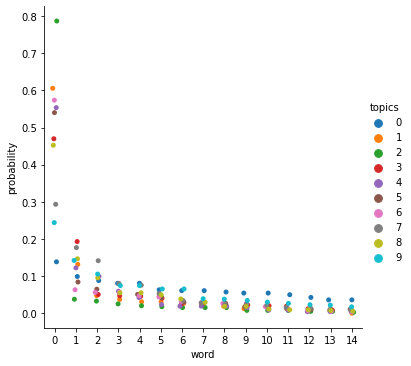

In [435]:
df_hist = df_topics[['weight_'+str(i) for i in range(0,n_top_words)]]
df_hist_tp = df_hist.transpose().reset_index()
df_hist_tp['word'] = df_hist_tp.apply(lambda x: x['index'].split('_')[1],axis=1)
df_hist_tp.drop(['index'],axis=1,inplace=True)
df_hist_melt = df_hist_tp.melt('word', var_name='topics', value_name='probability')
sns.catplot(x="word", y="probability", hue='topics', data=df_hist_melt)
df_hist.head()

The importance (as measured by probability) of words for each topic is concentrated among the top 4 words (zero to three)

In [436]:
# descr_temp = "When Stephen Covey first released The Seven Habits of Highly Effective People, the book became an instant rage because people suddenly got up and took notice that their lives were headed off in the wrong direction; and more than that, they realized that there were so many simple things they could do in order to navigate their life correctly. This book was wonderful education for people, education in how to live life effectively and get closer to the ideal of being a ‘success’ in life.But not everyone understands Stephen Covey’s model fully well, or maybe there are some people who haven’t read it yet. This is definitely true because we still see so much failure all around us. Now, I am not saying that by using Covey’s model, or anyone else’s model for that matter, you can become a sure-shot success, but at least we should have seen many more successes around us already judging by the number of copies the book has sold! So, where is the shortcoming?There are two main problems here, and we are talking only about the people who have read the book already. The first problem is that most people are too lazy to implement the ideals of Stephen Covey in their lives. They consider his masterpiece of a book as a mere coffee-table book or a book that you use for light reading when you are traveling and then forget all about it. They do not realize that this book contains life-changing information. Or, they take the information and do not make the effort to actually utilize it so that it becomes knowledge for them.The second problem is that a lot of people have a myopic view of Covey’s ideals. These are people who are impressed by the book already. If you ask them what the seven habits are, they can rattle them off end to end, but then they miss the larger picture. They do not understand that Covey was trying to tell more than he wrote in words. There are hidden implications in this book, yes, and a lot of people have just failed to see through them.That is what we are trying to do. We are trying to show you how Covey’s book, or rather, his model, was a complete model in itself. There was nothing amiss about it. If you implement it, there should be no aspect of your life that should go untouched. The only thing is that you have to understand these ideals and try to implement them in your life. But, before we barge into that area, it is extremely important to understand what these ideals are. What was the model that was propounded by Stephen Covey in his mega-famous book? We shall begin by trying to understand his model first, and then interpret it in such a way that it pertains to every aspect of our life"
# temp_2 = vectorizer.transform([preprocess(descr_temp)]).todense().tolist()

# for i in range(0,len(nmf.transform(temp_2)[0])):
#     print(i,nmf.transform(temp_2)[0][i])

transform_x = nmf.transform(X)
for nmfi in transform_x:
    for i in range(0,n_topics):
        nmfi[i] = 1 if nmfi[i] > 0.1 else 0

df6 = pd.DataFrame(transform_x,columns = ['topic '+str(i) for i in range(0,n_topics)])
df7 = df6.copy()
df7['sum'] = df6[df6.columns[0::]].sum(axis=1)
df7.head()

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,sum
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0


In [437]:
print(len(df7[df7['sum']==0].index))
df8 = df7.drop('sum', axis=1)
df8.head()

44


,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [438]:
df_out = df5_1.join(df8)
df_out = df_out.rename(columns = lambda x: x.strip())
df_out.to_csv('../data/books_25_pages_author_info_description_genres_topics.csv',index=False)
df_out.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,kindle_price,author_link,...,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,NaN,33082.0,NaN,https://www.goodreads.com/author/show/8529755....,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,NaN,15121.0,NaN,https://www.goodreads.com/author/show/3317.Dal...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,9.780743e+12,10277.0,NaN,https://www.goodreads.com/author/show/1538.Ste...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,9.781400e+12,16950.0,NaN,https://www.goodreads.com/author/show/5201530....,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,9.781608e+12,27998.0,9.99,https://www.goodreads.com/author/show/5589647....,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [439]:
# save the model
import pickle
filename_model = '../data/topic_model_tfidf_nmf.pickle'
pickle.dump(nmf, open(filename_model, 'wb'))

filename_model = '../data/topic_model_tfidf.pickle'
pickle.dump(vectorizer, open(filename_model, 'wb'))

# # load the model from disk
# loaded_model = pickle.load(open(filename_model, 'rb'))